In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import langid
import pyprind
from tqdm import tqdm
import string
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import unicodedata
from nltk.stem.porter import PorterStemmer
import contractions
from num2words import num2words 
import re
from cleantext import clean
import cleantext
from autocorrect import Speller

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
columns  = ["sentiment", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('twiter140.csv', encoding = "ISO-8859-1", names=columns)

In [5]:
df.head(5)


,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there."


In [6]:
data = df[['text', 'sentiment']].copy()

### sentiment labels ratio

In [64]:
data.groupby(['sentiment']).size()

sentiment
0    800000
4    800000
dtype: int64

In [65]:
data['number_of_letters'] = data['text'].apply(lambda x: len(x.replace(" ", "")))


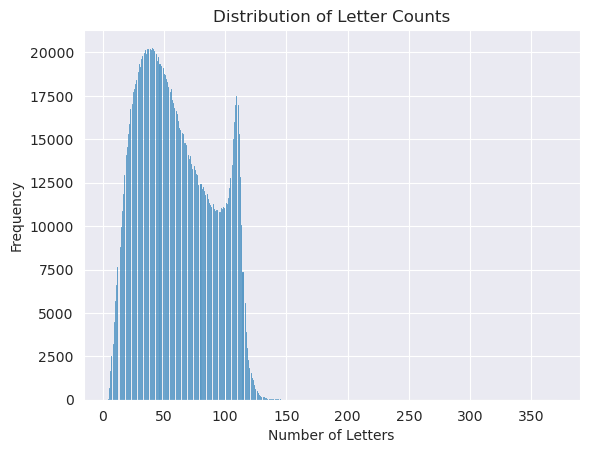

In [66]:
# Create a histogram of letter counts
sns.histplot(data['number_of_letters'])
plt.xlabel('Number of Letters')
plt.ylabel('Frequency')
plt.title('Distribution of Letter Counts')
plt.show()

### shortest and longest twitt

In [11]:
data.iloc[data['number_of_letters'].idxmin()], data.iloc[data['number_of_letters'].idxmax()]

(text                 Ugh   
 sentiment                 0
 number_of_letters         3
 Name: 310554, dtype: object,
 text                 @catfish_ohm à¹à¸à¹à¸²à¹à¸«à¹à¸?à¸²à¸£à¹...
 sentiment                                                            4
 number_of_letters                                                  371
 Name: 1295281, dtype: object)

In [12]:
data

,text,sentiment,number_of_letters
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,96
1,is upset that he can't update his Facebook by ...,0,90
2,@Kenichan I dived many times for the ball. Man...,0,71
3,my whole body feels itchy and like its on fire,0,37
4,"@nationwideclass no, it's not behaving at all....",0,90
...,...,...,...
1599995,Just woke up. Having no school is the best fee...,4,45
1599996,TheWDB.com - Very cool to hear old Walt interv...,4,67
1599997,Are you ready for your MoJo Makeover? Ask me f...,4,46
1599998,Happy 38th Birthday to my boo of alll time!!! ...,4,53


In [13]:
data.isnull().any()

text                 False
sentiment            False
number_of_letters    False
dtype: bool

In [14]:
data.text

0          @switchfoot http://twitpic.com/2y1zl - Awww, t...
1          is upset that he can't update his Facebook by ...
2          @Kenichan I dived many times for the ball. Man...
3            my whole body feels itchy and like its on fire 
4          @nationwideclass no, it's not behaving at all....
                                 ...                        
1599995    Just woke up. Having no school is the best fee...
1599996    TheWDB.com - Very cool to hear old Walt interv...
1599997    Are you ready for your MoJo Makeover? Ask me f...
1599998    Happy 38th Birthday to my boo of alll time!!! ...
1599999    happy #charitytuesday @theNSPCC @SparksCharity...
Name: text, Length: 1600000, dtype: object

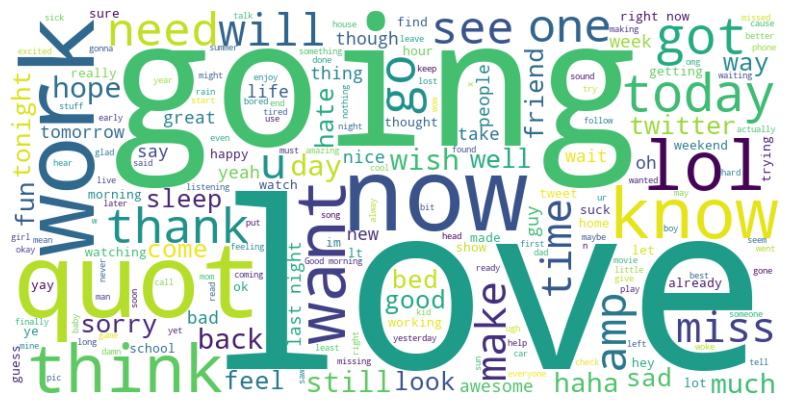

In [59]:
text = ' '.join(data['text'])

# Tworzenie chmury słów 
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Wyświetlenie chmury słów
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
print(text[0:1000])

@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah! @Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds my whole body feels itchy and like its on fire  @nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.  @Kwesidei not the whole crew  Need a hug  @LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ? @Tatiana_K nope they didn't have it  @twittera que me muera ?  spring break in plain city... it's snowing  I just re-pierced my ears  @caregiving I couldn't bear to watch it.  And I thought the UA loss was embarrassing . . . . . @octolinz16 It it counts, idk why I did either. you never talk to me anymore  @smarrison i would've been the first, but i didn't have a gun.    not rea

In [16]:
result_df = data[data['text'].str.contains('quot')]
result_df

,text,sentiment,number_of_letters
103,watching &quot;House&quot;,0,25
119,@eRRe_sC aaw i miss ya all too.. im leaving to...,0,104
124,"Late night snack, glass of OJ b/c I'm &quot;do...",0,102
183,Downloading NIN's new album &quot;the slip&quo...,0,98
206,My mind and body are severely protesting this ...,0,84
...,...,...,...
1599835,@alexandervelky that's polite version - i only...,4,120
1599840,What a pretty day &quot;Just smile&quot;,4,35
1599946,@chriscuzzy someone wanted a &quot;Cuzzy&quot;...,4,53
1599977,@MayorDorisWolfe Thats my girl - dishing out t...,4,59


# cleaning the data

Cleaning the tweets
- Lower Casing: Each text is converted to lowercase.
- Removing URLs: Links starting with 'http' or 'https' or 'www' are replaced by space.
- Removing Usernames: Replace @Usernames with word space.
- Replacing Emojies : replace all emojis from the emoji shortcodes [eg: 👍 to 'thumbs up']
- Replacing the chat words and numbers : replace all chat abrevations from the normal words [eg: lol to 'laugh out loud' and 1 to one]
- Replacing Contractions: Replacing contractions with their meanings. [eg: "can't" to 'can not']
- Removing Puntuations: Replacing characters other than Digits, Alphabets and pre-defined Symbols with a space.
- Lemmatization and replacing Consecutive letters: lemmatizing the words and replacing 3 or more consecutive letters are replaced by 1 letters. [eg: 'damnnnnnn' to 'damn']
- Replacing mistake of spellings : correcting the spelling mistakes. [eg. caar to car]
- Removing stopwords : words which are not meaningful to the sentiment of the sentence.

### chatwords to words xd

In [13]:
slang = pd.read_csv('slang.csv')
slang = slang[['acronym', 'expansion']]
slang

,acronym,expansion
0,2day,today
1,2m2h,too much too handle
2,2moro,tomorrow
3,2nite,tonight
4,4eae,for ever and ever
...,...,...
3352,yw,you are welcome
3353,ywca,young womens christian association
3354,ywimc,your wish is my command
3355,ywsyls,you win some you lose some


In [14]:
def replace_chat_words(word):
    normal_word = slang[slang['acronym'].isin([word])]['expansion'].values
    if len(normal_word):
        if word == "lol":
            return normal_word[1]
        else:
            return normal_word[0]
    elif word.isnumeric():
        return num2words(word)
    else:
        return word

# kindof pipeline

In [15]:
# stop_words = set(stopwords.words('english'))
# spell = Speller(lang='en')
# nlp = spacy.load('en_core_web_lg')
printable = set(string.printable)
emoji = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", re.UNICODE)

In [20]:
def processing_data(data):
    
    # deleting urls
    urlPattern = r"((http://)[^ ]*|(https://)[^ ]*|(www\.)[^ ]*)"
    data = data.apply(lambda x: re.sub(urlPattern, '', x, flags=re.IGNORECASE))
    
    # deleting hastags
    hashPattern = r'#\S+'
    data = data.apply(lambda x: re.sub(hashPattern, '', x, flags=re.IGNORECASE))

    # deleting webiste .com
    websitePattern = r'\b\w+\.com\b'
    data = data.apply(lambda x: re.sub(websitePattern, '', x, flags=re.IGNORECASE))
    
#     combinedPattern = r"((http://|https://|www\.)[^ ]*|\b#\w+\b|\b\w+\.com\b)"
#     data = data.apply(lambda x: re.sub(combinedPattern, '', x, flags=re.IGNORECASE))



    # contractions
    data = data.apply(lambda x: contractions.fix(x))
    
    # replacing slang
    data = data.apply(lambda x: " ".join([replace_chat_words(word) 
                                             if nltk.pos_tag([word])[0][1] in ['NN', "CD"] else word for word in x.split()]))
    
#     # replacing more than 3 into 1 and lemmatiz #FIXME doesnt work
#     data = data.apply(lambda x: " ".join([re.sub(sequencePattern, seqReplacePattern, str(token)) 
#               if token.pos_ in ["PROPN", 'NOUN'] else token.lemma_ for token in nlp(x)]))
    
#     # deleting @user
#     userPattern = r'@[^\s]+'
#     data = data.apply(lambda x: re.sub(userPattern, '', x, flags=re.IGNORECASE))
    
#     # deleting stop words
#     data = data.apply(lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words]))
    
#     # Remove emoiji
    data = data.apply(lambda x: re.sub(emoji, '', x))
    
#     # auto correct - it DOES NOT WORK well
#     data = data.apply(lambda x: spell(x))

    # delete weird characters
    data = data.apply(lambda x: ''.join(c for c in x if unicodedata.category(c)[0] != 'C'))
    data = data.apply(lambda x: x.encode('ascii', errors='ignore').decode())

#     # Remove whitespces
#     data = data.apply(lambda x: x.strip())
    try:
        data = data.apply(lambda x: cleantext.clean(x,
            extra_spaces=True ,  # Remove extra white spaces 
            stemming=False , # Stem the words
            stopwords=True ,# Remove stop words
            lowercase=True ,# Convert to lowercase
            numbers=True ,# Remove all digits 
            punct=True ,# Remove all punctuations
            reg=r'@[^\s]+', # Remove parts of text based on regex
            reg_replace= '', # String to replace the regex used in reg
            stp_lang='english'))  # Language for stop words
    except:
        print('wyczyszczone')


    return data

    

    
    

### dividing into batches

In [23]:
from tqdm import trange
import pandas as pd

df_list = []
clean_df_1 = pd.DataFrame()
chunk_size = 1000

# Inicjalizacja paska postępu
total_chunks = len(range(0, len(data), chunk_size))
for i in trange(0, len(data), chunk_size, desc="Processing chunks", total=total_chunks):
    chunk = data.iloc[i:i+chunk_size].copy()
    chunk['after_proc'] = processing_data(chunk['text'])
    df_list.append(chunk)

clean_df_1 = pd.concat(df_list, ignore_index=True)


Processing chunks:   3%|▎         | 47/1600 [02:08<1:09:41,  2.69s/it]

wyczyszczone


Processing chunks:   3%|▎         | 48/1600 [02:10<1:08:30,  2.65s/it]

wyczyszczone


Processing chunks:   5%|▌         | 81/1600 [03:44<1:19:46,  3.15s/it]

wyczyszczone


Processing chunks:   7%|▋         | 116/1600 [05:42<1:30:04,  3.64s/it]

wyczyszczone


Processing chunks:   8%|▊         | 136/1600 [06:43<1:15:17,  3.09s/it]

wyczyszczone


Processing chunks:   9%|▉         | 147/1600 [07:19<1:24:41,  3.50s/it]

wyczyszczone


Processing chunks:   9%|▉         | 148/1600 [07:22<1:22:23,  3.40s/it]

wyczyszczone


Processing chunks:  13%|█▎        | 204/1600 [10:25<1:09:18,  2.98s/it]

wyczyszczone


Processing chunks:  15%|█▍        | 238/1600 [12:11<1:06:25,  2.93s/it]

wyczyszczone


Processing chunks:  19%|█▊        | 299/1600 [15:53<1:22:57,  3.83s/it]

wyczyszczone


Processing chunks:  20%|██        | 320/1600 [17:17<1:38:52,  4.63s/it]

wyczyszczone


Processing chunks:  21%|██        | 331/1600 [18:02<1:24:24,  3.99s/it]

wyczyszczone


Processing chunks:  23%|██▎       | 362/1600 [20:03<1:16:29,  3.71s/it]

wyczyszczone


Processing chunks:  31%|███       | 489/1600 [27:59<1:08:15,  3.69s/it]

wyczyszczone


Processing chunks:  32%|███▏      | 505/1600 [29:03<1:09:48,  3.83s/it]

wyczyszczone


Processing chunks:  34%|███▍      | 541/1600 [31:22<1:14:31,  4.22s/it]

wyczyszczone


Processing chunks:  36%|███▌      | 572/1600 [33:23<1:02:58,  3.68s/it]

wyczyszczone


Processing chunks:  38%|███▊      | 606/1600 [35:41<1:03:39,  3.84s/it]

wyczyszczone


Processing chunks:  39%|███▉      | 625/1600 [36:56<1:01:27,  3.78s/it]

wyczyszczone


Processing chunks:  43%|████▎     | 681/1600 [40:54<1:08:31,  4.47s/it]

wyczyszczone


Processing chunks:  43%|████▎     | 695/1600 [41:49<58:09,  3.86s/it]  

wyczyszczone


Processing chunks:  46%|████▌     | 732/1600 [44:10<50:35,  3.50s/it]  

wyczyszczone


Processing chunks:  48%|████▊     | 767/1600 [46:25<44:10,  3.18s/it]  

wyczyszczone


Processing chunks:  50%|█████     | 803/1600 [48:16<38:40,  2.91s/it]

wyczyszczone


Processing chunks:  50%|█████     | 805/1600 [48:21<38:10,  2.88s/it]

wyczyszczone


Processing chunks:  51%|█████     | 814/1600 [48:47<38:19,  2.93s/it]

wyczyszczone


Processing chunks:  52%|█████▏    | 831/1600 [49:36<37:09,  2.90s/it]

wyczyszczone


Processing chunks:  54%|█████▍    | 863/1600 [51:09<35:52,  2.92s/it]

wyczyszczone


Processing chunks:  54%|█████▍    | 865/1600 [51:15<36:00,  2.94s/it]

wyczyszczone


Processing chunks:  55%|█████▍    | 874/1600 [51:42<35:22,  2.92s/it]

wyczyszczone


Processing chunks:  55%|█████▍    | 878/1600 [51:54<35:35,  2.96s/it]

wyczyszczone


Processing chunks:  55%|█████▍    | 879/1600 [51:57<35:22,  2.94s/it]

wyczyszczone


Processing chunks:  55%|█████▌    | 887/1600 [52:20<34:10,  2.88s/it]

wyczyszczone


Processing chunks:  56%|█████▌    | 891/1600 [52:31<33:39,  2.85s/it]

wyczyszczone


Processing chunks:  57%|█████▋    | 906/1600 [53:14<32:22,  2.80s/it]

wyczyszczone


Processing chunks:  57%|█████▋    | 911/1600 [53:28<31:59,  2.79s/it]

wyczyszczone


Processing chunks:  57%|█████▋    | 912/1600 [53:31<31:33,  2.75s/it]

wyczyszczone


Processing chunks:  59%|█████▉    | 948/1600 [55:12<29:50,  2.75s/it]

wyczyszczone


Processing chunks:  60%|█████▉    | 954/1600 [55:30<30:39,  2.85s/it]

wyczyszczone


Processing chunks:  60%|█████▉    | 957/1600 [55:38<30:10,  2.82s/it]

wyczyszczone


Processing chunks:  60%|██████    | 960/1600 [55:46<29:49,  2.80s/it]

wyczyszczone


Processing chunks:  60%|██████    | 961/1600 [55:49<29:39,  2.79s/it]

wyczyszczone


Processing chunks:  61%|██████    | 969/1600 [56:12<29:18,  2.79s/it]

wyczyszczone


Processing chunks:  61%|██████    | 970/1600 [56:14<29:18,  2.79s/it]

wyczyszczone


Processing chunks:  61%|██████    | 971/1600 [56:17<28:51,  2.75s/it]

wyczyszczone


Processing chunks:  61%|██████▏   | 982/1600 [56:49<30:24,  2.95s/it]

wyczyszczone


Processing chunks:  61%|██████▏   | 983/1600 [56:52<30:01,  2.92s/it]

wyczyszczone


Processing chunks:  62%|██████▏   | 985/1600 [56:58<29:33,  2.88s/it]

wyczyszczone


Processing chunks:  63%|██████▎   | 1004/1600 [57:52<28:14,  2.84s/it]

wyczyszczone


Processing chunks:  63%|██████▎   | 1005/1600 [57:55<27:48,  2.80s/it]

wyczyszczone


Processing chunks:  63%|██████▎   | 1009/1600 [58:06<27:34,  2.80s/it]

wyczyszczone


Processing chunks:  63%|██████▎   | 1010/1600 [58:09<27:39,  2.81s/it]

wyczyszczone


Processing chunks:  63%|██████▎   | 1011/1600 [58:12<27:46,  2.83s/it]

wyczyszczone


Processing chunks:  63%|██████▎   | 1012/1600 [58:15<27:36,  2.82s/it]

wyczyszczone


Processing chunks:  63%|██████▎   | 1015/1600 [58:23<26:40,  2.74s/it]

wyczyszczone


Processing chunks:  66%|██████▌   | 1049/1600 [1:00:00<25:35,  2.79s/it]

wyczyszczone


Processing chunks:  66%|██████▌   | 1051/1600 [1:00:06<25:24,  2.78s/it]

wyczyszczone


Processing chunks:  66%|██████▌   | 1055/1600 [1:00:17<25:07,  2.77s/it]

wyczyszczone


Processing chunks:  68%|██████▊   | 1086/1600 [1:01:44<24:15,  2.83s/it]

wyczyszczone


Processing chunks:  68%|██████▊   | 1091/1600 [1:01:58<24:09,  2.85s/it]

wyczyszczone


Processing chunks:  69%|██████▉   | 1110/1600 [1:02:52<22:37,  2.77s/it]

wyczyszczone


Processing chunks:  69%|██████▉   | 1111/1600 [1:02:54<22:29,  2.76s/it]

wyczyszczone


Processing chunks:  70%|██████▉   | 1119/1600 [1:03:16<21:42,  2.71s/it]

wyczyszczone


Processing chunks:  72%|███████▏  | 1144/1600 [1:04:26<21:05,  2.78s/it]

wyczyszczone


Processing chunks:  73%|███████▎  | 1162/1600 [1:05:17<20:49,  2.85s/it]

wyczyszczone


Processing chunks:  73%|███████▎  | 1165/1600 [1:05:26<20:28,  2.82s/it]

wyczyszczone


Processing chunks:  73%|███████▎  | 1168/1600 [1:05:34<20:00,  2.78s/it]

wyczyszczone


Processing chunks:  73%|███████▎  | 1174/1600 [1:05:51<20:01,  2.82s/it]

wyczyszczone


Processing chunks:  74%|███████▎  | 1177/1600 [1:06:00<19:50,  2.81s/it]

wyczyszczone


Processing chunks:  74%|███████▎  | 1179/1600 [1:06:05<19:13,  2.74s/it]

wyczyszczone


Processing chunks:  74%|███████▍  | 1182/1600 [1:06:13<19:21,  2.78s/it]

wyczyszczone


Processing chunks:  74%|███████▍  | 1183/1600 [1:06:16<19:10,  2.76s/it]

wyczyszczone


Processing chunks:  74%|███████▍  | 1190/1600 [1:06:36<19:15,  2.82s/it]

wyczyszczone


Processing chunks:  76%|███████▌  | 1211/1600 [1:07:35<18:31,  2.86s/it]

wyczyszczone


Processing chunks:  76%|███████▌  | 1215/1600 [1:07:46<18:14,  2.84s/it]

wyczyszczone


Processing chunks:  76%|███████▌  | 1218/1600 [1:07:55<17:54,  2.81s/it]

wyczyszczone


Processing chunks:  77%|███████▋  | 1231/1600 [1:08:34<18:09,  2.95s/it]

wyczyszczone


Processing chunks:  78%|███████▊  | 1253/1600 [1:09:36<16:06,  2.79s/it]

wyczyszczone


Processing chunks:  78%|███████▊  | 1255/1600 [1:09:42<15:48,  2.75s/it]

wyczyszczone


Processing chunks:  79%|███████▉  | 1263/1600 [1:10:04<15:55,  2.84s/it]

wyczyszczone


Processing chunks:  79%|███████▉  | 1264/1600 [1:10:07<15:48,  2.82s/it]

wyczyszczone


Processing chunks:  80%|████████  | 1286/1600 [1:11:10<14:58,  2.86s/it]

wyczyszczone


Processing chunks:  81%|████████  | 1294/1600 [1:11:33<14:14,  2.79s/it]

wyczyszczone


Processing chunks:  81%|████████  | 1295/1600 [1:11:35<14:03,  2.76s/it]

wyczyszczone


Processing chunks:  81%|████████  | 1296/1600 [1:11:38<13:54,  2.75s/it]

wyczyszczone


Processing chunks:  81%|████████  | 1297/1600 [1:11:41<13:53,  2.75s/it]

wyczyszczone


Processing chunks:  81%|████████▏ | 1300/1600 [1:11:49<13:58,  2.80s/it]

wyczyszczone


Processing chunks:  82%|████████▏ | 1305/1600 [1:12:03<13:51,  2.82s/it]

wyczyszczone


Processing chunks:  84%|████████▍ | 1340/1600 [1:13:44<12:15,  2.83s/it]

wyczyszczone


Processing chunks:  84%|████████▍ | 1348/1600 [1:14:07<11:48,  2.81s/it]

wyczyszczone


Processing chunks:  84%|████████▍ | 1349/1600 [1:14:10<11:41,  2.80s/it]

wyczyszczone


Processing chunks:  84%|████████▍ | 1350/1600 [1:14:12<11:37,  2.79s/it]

wyczyszczone


Processing chunks:  85%|████████▍ | 1353/1600 [1:14:20<11:08,  2.71s/it]

wyczyszczone


Processing chunks:  85%|████████▍ | 1355/1600 [1:14:26<11:13,  2.75s/it]

wyczyszczone


Processing chunks:  85%|████████▍ | 1357/1600 [1:14:31<11:09,  2.75s/it]

wyczyszczone


Processing chunks:  85%|████████▍ | 1358/1600 [1:14:34<11:02,  2.74s/it]

wyczyszczone


Processing chunks:  85%|████████▍ | 1359/1600 [1:14:37<11:04,  2.76s/it]

wyczyszczone


Processing chunks:  85%|████████▌ | 1360/1600 [1:14:40<10:57,  2.74s/it]

wyczyszczone


Processing chunks:  85%|████████▌ | 1361/1600 [1:14:43<11:03,  2.77s/it]

wyczyszczone


Processing chunks:  85%|████████▌ | 1362/1600 [1:14:45<10:52,  2.74s/it]

wyczyszczone


Processing chunks:  85%|████████▌ | 1363/1600 [1:14:48<10:39,  2.70s/it]

wyczyszczone


Processing chunks:  85%|████████▌ | 1364/1600 [1:14:50<10:29,  2.67s/it]

wyczyszczone


Processing chunks:  85%|████████▌ | 1365/1600 [1:14:53<10:33,  2.70s/it]

wyczyszczone


Processing chunks:  85%|████████▌ | 1366/1600 [1:14:56<10:25,  2.67s/it]

wyczyszczone


Processing chunks:  86%|████████▌ | 1369/1600 [1:15:04<10:30,  2.73s/it]

wyczyszczone


Processing chunks:  86%|████████▌ | 1371/1600 [1:15:10<10:29,  2.75s/it]

wyczyszczone


Processing chunks:  88%|████████▊ | 1405/1600 [1:16:46<09:07,  2.81s/it]

wyczyszczone


Processing chunks:  88%|████████▊ | 1406/1600 [1:16:49<09:03,  2.80s/it]

wyczyszczone


Processing chunks:  88%|████████▊ | 1407/1600 [1:16:52<08:52,  2.76s/it]

wyczyszczone


Processing chunks:  88%|████████▊ | 1408/1600 [1:16:54<08:45,  2.74s/it]

wyczyszczone


Processing chunks:  88%|████████▊ | 1409/1600 [1:16:57<08:38,  2.72s/it]

wyczyszczone


Processing chunks:  88%|████████▊ | 1412/1600 [1:17:05<08:35,  2.74s/it]

wyczyszczone


Processing chunks:  88%|████████▊ | 1415/1600 [1:17:13<08:27,  2.74s/it]

wyczyszczone


Processing chunks:  89%|████████▊ | 1417/1600 [1:17:19<08:32,  2.80s/it]

wyczyszczone


Processing chunks:  89%|████████▊ | 1419/1600 [1:17:25<08:20,  2.77s/it]

wyczyszczone


Processing chunks:  89%|████████▉ | 1421/1600 [1:17:30<08:17,  2.78s/it]

wyczyszczone


Processing chunks:  89%|████████▉ | 1423/1600 [1:17:36<08:22,  2.84s/it]

wyczyszczone


Processing chunks:  89%|████████▉ | 1426/1600 [1:17:44<08:09,  2.82s/it]

wyczyszczone


Processing chunks:  90%|████████▉ | 1434/1600 [1:18:06<07:25,  2.68s/it]

wyczyszczone


Processing chunks:  90%|████████▉ | 1437/1600 [1:18:14<07:17,  2.68s/it]

wyczyszczone


Processing chunks:  90%|█████████ | 1441/1600 [1:18:25<07:19,  2.76s/it]

wyczyszczone


Processing chunks:  93%|█████████▎| 1484/1600 [1:20:26<05:20,  2.77s/it]

wyczyszczone


Processing chunks:  93%|█████████▎| 1485/1600 [1:20:29<05:13,  2.73s/it]

wyczyszczone


Processing chunks:  94%|█████████▍| 1509/1600 [1:21:35<04:11,  2.77s/it]

wyczyszczone


Processing chunks:  95%|█████████▍| 1513/1600 [1:21:46<04:05,  2.82s/it]

wyczyszczone


Processing chunks:  95%|█████████▍| 1518/1600 [1:22:01<03:52,  2.83s/it]

wyczyszczone


Processing chunks:  96%|█████████▌| 1531/1600 [1:22:37<03:12,  2.79s/it]

wyczyszczone


Processing chunks:  96%|█████████▌| 1537/1600 [1:22:53<02:53,  2.76s/it]

wyczyszczone


Processing chunks:  96%|█████████▋| 1543/1600 [1:23:10<02:37,  2.76s/it]

wyczyszczone


Processing chunks: 100%|█████████▉| 1595/1600 [1:25:35<00:13,  2.75s/it]

wyczyszczone


Processing chunks: 100%|██████████| 1600/1600 [1:25:49<00:00,  3.22s/it]


In [26]:
clean_df_1

,text,sentiment,after_proc
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,awww bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,upset cannot update facebook texting might cry result school today also blah
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,0,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,behaving mad cannot see
...,...,...,...
1599995,Just woke up. Having no school is the best feeling ever,4,woke school best feeling ever
1599996,TheWDB.com - Very cool to hear old Walt interviews! â« http://blip.fm/~8bmta,4,cool hear old walt interviews
1599997,Are you ready for your MoJo Makeover? Ask me for details,4,ready mojo makeover ask details
1599998,Happy 38th Birthday to my boo of alll time!!! Tupac Amaru Shakur,4,happy th birthday boo alll time tupac amaru shakur


### drop empty records

In [27]:
empty_rows = clean_df_1[clean_df_1['after_proc'] == '']
empty_rows

,text,sentiment,after_proc
83,@markhardy1974 Me too #itm,0,
208,@mandayyy,0,
249,@mandayyy,0,
282,@ITS_NEMESIS -------,0,
398,@danadearmond,0,
...,...,...,...
1598921,If only?,4,
1599494,@Sworn4DaBosses,4,
1599552,@francii_ me too,4,
1599811,to be with you,4,


In [28]:
clean_df_2 = clean_df_1[clean_df_1['after_proc'] != '']

In [69]:
clean_df_2.head(10)

,text,sentiment,after_proc
0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D",0,awww bummer shoulda got david carr third day
1,is upset that he can't update his Facebook by texting it... and might cry as a result School today also. Blah!,0,upset cannot update facebook texting might cry result school today also blah
2,@Kenichan I dived many times for the ball. Managed to save 50% The rest go out of bounds,0,dived many times ball managed save rest go bounds
3,my whole body feels itchy and like its on fire,0,whole body feels itchy like fire
4,"@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there.",0,behaving mad cannot see
5,@Kwesidei not the whole crew,0,whole crew
6,Need a hug,0,need hug
7,"@LOLTrish hey long time no see! Yes.. Rains a bit ,only a bit LOL , I'm fine thanks , how's you ?",0,hey long tears eyes see yes rains bit bit lol fine thanks
8,@Tatiana_K nope they didn't have it,0,nope
9,@twittera que me muera ?,0,que muera


### checking language

In [ ]:
clean_df_3 = clean_df_2[clean_df_2['after_proc'].apply(lambda x: langid.classify(x)[0] == 'en')] # wywalamy nie ang

In [ ]:
clean_df_3

In [ ]:
# clean_df_4['stemmed_text'] = clean_df_3['after_proc'].apply(lambda x: ' '.join([porter_stemmer.stem(word) for word in x.split()]))

### saving to csv

In [32]:
clean_df_3.to_csv('clean_data2.csv', index=False) 

# Processed data

In [64]:
proc_data = pd.read_csv('clean_data2.csv')
proc_data = proc_data.drop('text', axis=1)
proc_data['sentiment'] = proc_data['sentiment'].replace(4, 1) #### change sentiment = 4 to 1
data = proc_data.rename(columns={'after_proc': 'text'})

In [65]:
data

,sentiment,text
0,0,awww bummer shoulda got david carr third day
1,0,upset cannot update facebook texting might cry result school today also blah
2,0,dived many times ball managed save rest go bounds
3,0,whole body feels itchy like fire
4,0,behaving mad cannot see
...,...,...
1332077,1,mmmm sounds absolutely perfect schedule full tears eyes lay bed sunday ugh
1332078,1,yeah work better waiting end wonder tears eyes keep good blog
1332079,1,cool hear old walt interviews
1332080,1,happy th birthday boo alll time tupac amaru shakur
